# Spam Detector

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [47]:
# Import the data
df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.


Quick review of strengths/weaknesses:

Logistic Regression: 
+ Cannot be applied to non-linear classification problems.  Requires good signal to noise ratio.  
- Colinearity and outliers tamper with the accuracy of the LR model.  

Random Forest: 
+ Doesn't require pre-processing of data.  It handles co-linearity efficiently.
- However, it is susceptible to overfitting and prone to outliers.  It can lose information while handling continous variables.

Prediction:
I think it's possible that many Features will be colinear and that Random Forest will handle those better.  

Linear Regression will overfit if we do not assess/remove the colinearity.

Interim goals:
Graphing the data and checking colinearity would help to determine which model might be best suited for this dataset.


In [48]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


## Split the Data into Training and Testing Sets

In [49]:
# Create the labels set `y` and features DataFrame `X`
y = df['spam']
X = df.drop(columns='spam')
display(y.head())
display(X.head())

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [50]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

In [70]:
# Split the data into X_train, X_test, y_train, y_test
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [71]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model
X_scaler = StandardScaler()
# Fit the Standard Scaler with the training data 
X_scaler.fit(X_train)

# Scale the TRAINING DATA and TEST DATA SEPARATELY with the Transform Function
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [72]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 1)
lr_model.fit(X_train_scaled, y_train)

# Calculate the model accuracy on the Training Data
print(f"Training Data Score: {lr_model.score(X_train_scaled, y_train)}")
# Score the model:
print(f"Training Data Score: {lr_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9295652173913044
Training Data Score: 0.9295652173913044
Testing Data Score: 0.9278887923544744


In [25]:
# Make and save testing predictions with the saved logistic regression model using the test data
# Apply the fitted model to the `test` dataset
testing_predictions = lr_model.predict()

# Apply the fitted model to the `training` dataset
predictions = lr_model.predict(X_train)


# Review the predictions


In [26]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.


## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [74]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
clf = RandomForestClassifier(random_state=1, 
				n_estimators=500).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9997101449275362
Testing Score: 0.9652476107732406


In [28]:
# Make and save testing predictions with the saved Random Forest Classifier ? using the test data


# Review the predictions


In [29]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.


In [78]:
# Get the feature importance array
feature_importances = clf.feature_importances_

importances_sorted = sorted(zip(feature_importances, 
						X.columns), reverse=True)
importances_sorted[:10]

[(0.12192112814008209, 'char_freq_!'),
 (0.09533933570058972, 'char_freq_$'),
 (0.07158337229698059, 'word_freq_free'),
 (0.06923901267709875, 'word_freq_remove'),
 (0.06811104369368015, 'capital_run_length_average'),
 (0.05579496385525832, 'capital_run_length_longest'),
 (0.0533025421651241, 'word_freq_your'),
 (0.045464200536752736, 'capital_run_length_total'),
 (0.03860171446883917, 'word_freq_hp'),
 (0.03164392902362354, 'word_freq_money')]

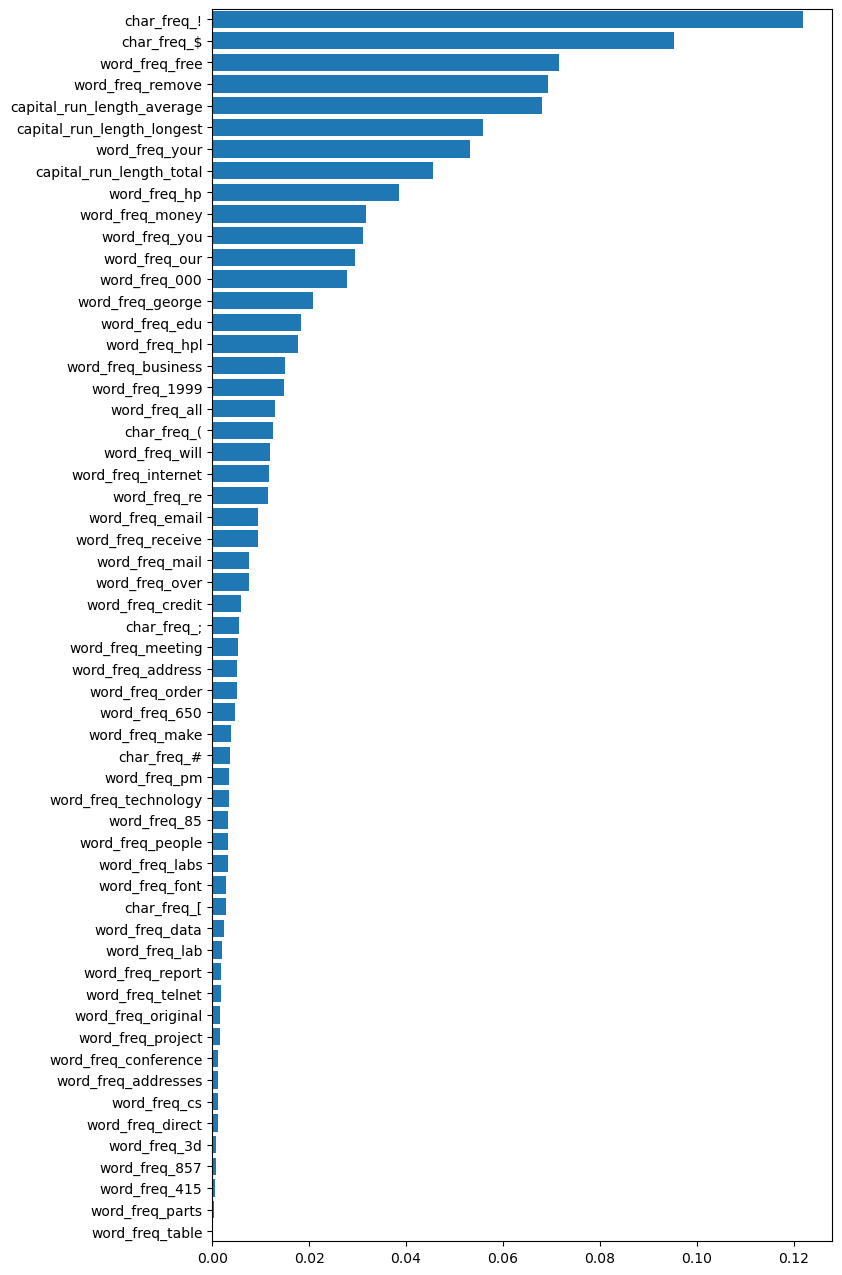

In [77]:
# Plot the feature importances
from matplotlib import pyplot as plt

features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
fig, ax = plt.subplots()
fig.set_size_inches(8,16)
plt.margins(y=0.001)
ax.barh(y=cols, width=width)
plt.show()

## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

*Replace the text in this markdown cell with your answers to these questions.*